# Assigment 7 - Issue [#979](https://github.com/alexanderquispe/Diplomado_PUCP/issues/979)
**Deadline: September 7th - 23:59**

Fernando Mendoza | Andrea Pezo | Michel Cotrina | Estefanny Gil | Armando Ore


1. Import the data located at [this link](https://github.com/alexanderquispe/Diplomado_PUCP/blob/main/_data/data_dengue_peru.csv). It has information on people infected with dengue at the district level for 2015 to 2021.

2. Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: [Use this code](https://stackoverflow.com/questions/35552874/get-first-letter-of-a-string-from-column).

3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this [shapefile](https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI).

4. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this [shapefile](https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI). For this task, you will have to aggregate shapefiles at the province level.

5. Use geopandas to plot the number of cases by the department for all the years using subplots. --Every subplot for each year. Do not forget to indicate the color of NA values. Use this [shapefile](https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI). For this task, you will have to aggregate shapefiles at the department level.

6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this [shapefile](https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI). For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.


## Step 0. Libraries

In [1]:
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd
import geopandas as gpd

## Step 1. Load data

In [3]:
pwd

'C:\\Users\\a3ore\\Documentos\\GitHub\\Diplomado_PUCP\\Lecture_9\\Assignment_7'

In [106]:
dengue = pd.read_csv( r"../../_data/data_dengue_peru.csv",
        dtype={'Ubigeo': 'str'}, 
        converters={'Casos': lambda x: float(x.replace(',', '')) if x != '' else np.nan})
dengue.head()

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0


## Step 2. Generate ubigeo for Departments and Provinces taking the first two and four numbers

In [108]:
# Generate department and province codes
dengue['Departamento_Ubigeo'] = dengue['Ubigeo'].str[:2]
dengue['Provincia_Ubigeo'] = dengue['Ubigeo'].str[:4]
dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Departamento_Ubigeo,Provincia_Ubigeo
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


## 1.4. Step 3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend

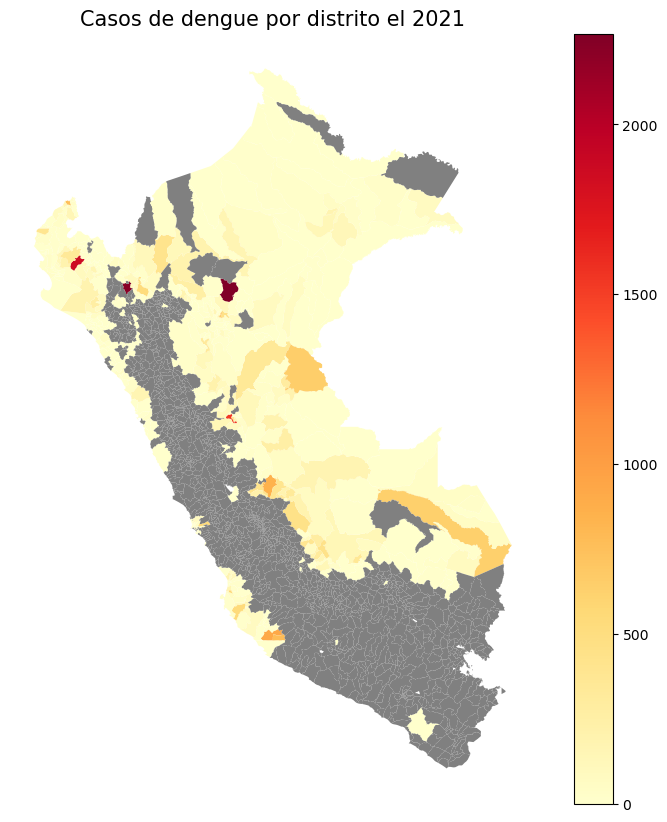

In [118]:
 # Filter dengue data in 2021
dengue_2021 = dengue[dengue['Año'] == 2021]

# Cases by district
cases_by_district = dengue_2021.groupby('Ubigeo')['Casos'].sum().reset_index()

# Load the shapefile
districts_gdf = gpd.read_file('../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

# Merge cases data with districts geodataframe using Ubigeo column
merged_gdf = districts_gdf.merge(cases_by_district, left_on='CODIGO', right_on='Ubigeo', how='left')

# Plot set up
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Map plot setting specifying color for NaN values
merged_gdf.plot(column='Casos', cmap='YlOrRd', legend=True,
               missing_kwds={"color": "grey", "label": "No data"},
               ax=ax)

# Add a title and adjust the legend
ax.set_title('Casos de dengue por distrito el 2021', fontsize=15)
ax.set_axis_off()  # Turn off the axis

plt.show()

# 1.5. Step 4 Use geopandas to plot the number of cases in 2021 by the province using a continuous legend

In [ ]:
# Filter dengue data for 2021
dengue_2021 = dengue[dengue['Año'] == 2021]

# Aggregate cases by province
cases_by_province = dengue_2021.groupby('Provincia_Ubigeo')['Casos'].sum().reset_index()

# Load the shapefile for provinces
provinces_gdf = gpd.read_file('../../_data/LIMITE_PROVINCIAL_2020_INEI/INEI_LIMITE_PROVINCIAL.shp')

# Merge cases data with provinces geodataframe using the Provincia_Ubigeo column
merged_gdf_province = provinces_gdf.merge(cases_by_province, left_on='CODIGO_PROVINCIA', right_on='Provincia_Ubigeo', how='left')

# Plot setup
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Map plot setting specifying color for NaN values
merged_gdf_province.plot(column='Casos', cmap='YlOrRd', legend=True,
                         missing_kwds={"color": "grey", "label": "No data"},
                         ax=ax)

# Add a title and adjust the legend
ax.set_title('Dengue Cases by Province in 2021', fontsize=15)
ax.set_axis_off()  # Turn off the axis

plt.show()
